<a href="https://colab.research.google.com/github/benhutchins25/benhutchins25/blob/main/First_mess_around_with_FaIR_from_Ipython_Binder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
%matplotlib inline

In [22]:
pip install fair # installthe Finite Amplitude Impulse-Response simple climate-carbon-cycle model

In [23]:
import fair # import fair

In [24]:
import numpy as np # import numpy for maths

from matplotlib import pyplot as plt # import matplotlib for graphs
plt.style.use('seaborn-darkgrid') # set up the grid background for the figures
plt.rcParams['figure.figsize'] = (16, 9) # specify the size of the graphs

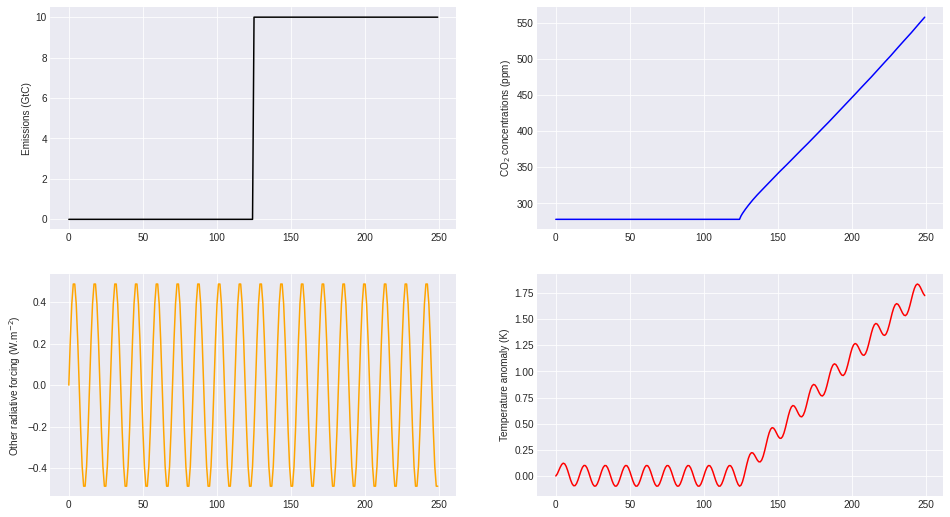

In [25]:
emissions = np.zeros(250) # create an array for emissions of 250 zeros
emissions[125:] = 10.0 # specify that from number 125 onwards emissions will be 10 (half of the array is zeros, the other half is 10's (as per top left figure))
other_rf = np.zeros(emissions.size) # specify another dataset - other_rf - as an array of zeros that is the same size as emissions
#print(other_rf)
for x in range(0, emissions.size): # a loop that specifies a formula for generating values for each number from 0 to 250
    other_rf[x] = 0.5 * np.sin(2 * np.pi * (x) / 14.0) # the formula for generating these values
    
C,F,T = fair.forward.fair_scm( #command to import fair_scm from fari.forward
    emissions=emissions, # setting the emissions parameter as the array of 0's and 10's
    other_rf=other_rf, # establishing the other radiative forcing as the formula above
    useMultigas=False # set multigas as false to use carbon dioxide emissions only with all other radiative forcing specified alternatively
)

fig = plt.figure() # setting up to be able to plot figures in nice window pattern
ax1 = fig.add_subplot(221) #  *pos* is a three digit integer, where the first digit is the number of rows, the second the number of columns, and the third the index of the subplot. i.e. fig.add_subplot(235) is the same as fig.add_subplot(2, 3, 5). Note that all integers must be less than 10 for this form to work.
ax1.plot(range(0, emissions.size), emissions, color='black') # specify the top left figure, where the x axis gives a range from 0 to emissions size (250) and the y-axis is the emissions array of 0's and 10's
ax1.set_ylabel('Emissions (GtC)') # set the ylabel as emissions in gigatons of carbon
ax2 = fig.add_subplot(222) # 222 specifies the position of the graph
ax2.plot(range(0, emissions.size), C, color='blue') # specify top right figure, where the x-axis is emissions size and C, which is the co2 concentration in ppm
ax2.set_ylabel('CO$_2$ concentrations (ppm)') # set the y-axis label for co2 concentrations
ax3 = fig.add_subplot(223) # once again establish the position of the bottom left plot
ax3.plot(range(0, emissions.size), other_rf, color='orange') # x axis is a range from 0 - 250 and y-axis is the other radiative forcing sine wave thing according to the formula above
ax3.set_ylabel('Other radiative forcing (W.m$^{-2}$)') # set the axis label for other radiative forcing in w m^-2 (other things that aren't co2)
ax4 = fig.add_subplot(224) # add a subplot to the bottom right proportion
ax4.plot(range(0, emissions.size), T, color='red') # x-axis (0-250) and y-axis is the temperature anomaly in K
ax4.set_ylabel('Temperature anomaly (K)'); # set the y-axis label for temperature anomaly in Kelvin

RCPs

We can run FaIR with the CO$_2$ emissions and non-CO$_2$ forcing from the four representative concentration pathway scenarios. To use the emissions-based version specify ```useMultigas=True``` in the call to ```fair_scm()```.

By default in multi-gas mode, volcanic and solar forcing plus natural emissions of methane and nitrous oxide are switched on.


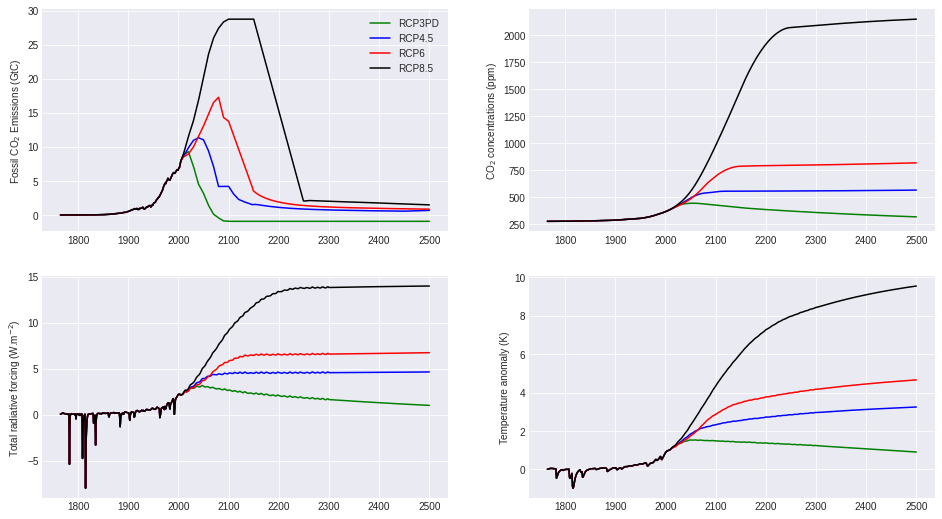

In [26]:
from fair.RCPs import rcp3pd, rcp45, rcp6, rcp85 # from the fair RCPs file import the following RCPs (3, 4.5, 6, 8.5)

fig = plt.figure() # set up the multifigure structure
ax1 = fig.add_subplot(221) # establish the positions of each of the graphs within the subplot thing
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

C26, F26, T26 = fair.forward.fair_scm(emissions=rcp3pd.Emissions.emissions) # C = co2 concentrations (ppm), F = radiative forcing (W m^-2), T = temperature (K)
ax1.plot(rcp3pd.Emissions.year, rcp3pd.Emissions.co2_fossil, color='green', label='RCP3PD') # plot each of the annual carbon emissions from RCP2.6 for the top left subplot
ax2.plot(rcp3pd.Emissions.year, C26[:, 0], color='green') # plot the co2 concentrations (ppm) for RCP 2.6 in the top right plot
ax3.plot(rcp3pd.Emissions.year, np.sum(F26, axis=1), color='green') # plot the total radiative forcing for RCP 2.6 in the bottom left subplot
ax4.plot(rcp3pd.Emissions.year, T26, color='green') # plot the temperature anomaly (K) for RCP2.6

C45, F45, T45 = fair.forward.fair_scm(emissions=rcp45.Emissions.emissions) # RCP 4.5
ax1.plot(rcp45.Emissions.year, rcp45.Emissions.co2_fossil, color='blue', label='RCP4.5') # RCP 4.5 top left fossil CO2 emissions (GtC)
ax2.plot(rcp45.Emissions.year, C45[:, 0], color='blue') # RCP 4.5 top right plot co2 concentrations (ppm)
ax3.plot(rcp45.Emissions.year, np.sum(F45, axis=1), color='blue') # RCP 4.5 botoom left plot raditive forcing (W m^-2)
ax4.plot(rcp45.Emissions.year, T45, color='blue') # RCP 4.5  bottom right plot temperature anomaly (K)

C60, F60, T60 = fair.forward.fair_scm(emissions=rcp6.Emissions.emissions) # plots for RCP 6
ax1.plot(rcp6.Emissions.year, rcp6.Emissions.co2_fossil, color='red', label='RCP6') # RCP 6 fossil CO2 emissions
ax2.plot(rcp6.Emissions.year, C60[:, 0], color='red') # RCP 6 co2 concentrtaions (ppm)
ax3.plot(rcp6.Emissions.year, np.sum(F60, axis=1), color='red') # RCP 6 radiative forcing (W m^-2)
ax4.plot(rcp6.Emissions.year, T60, color='red') # RCP 6 temperature anomaly (K)

C85, F85, T85 = fair.forward.fair_scm(emissions=rcp85.Emissions.emissions) # plots for RCP 8.5
ax1.plot(rcp85.Emissions.year, rcp85.Emissions.co2_fossil, color='black', label='RCP8.5') # RCP 8.5 fossil co2 emissions (GtC)
ax2.plot(rcp85.Emissions.year, C85[:, 0], color='black') # RCP 8.5 co2 concentrations (ppm)
ax3.plot(rcp85.Emissions.year, np.sum(F85, axis=1), color='black') # RCP 8.5 radiative forcing (W m^-2)
ax4.plot(rcp85.Emissions.year, T85, color='black') # RCP 8.5 temperature anomaly (K)

# labels and legends

ax1.set_ylabel('Fossil CO$_2$ Emissions (GtC)')
ax1.legend()
ax2.set_ylabel('CO$_2$ concentrations (ppm)')
ax3.set_ylabel('Total radiative forcing (W.m$^{-2}$)')
ax4.set_ylabel('Temperature anomaly (K)');

## Concentrations of well-mixed greenhouse gases

The output of FaIR (in most cases) is a 3-element tuple of concentrations, effective radiative forcing and temperature change since pre-industrial. Concentrations are a 31-column array of greenhouse gases. The indices correspond to the order given in the RCP concentration datasets (table 2 in Smith et al., https://www.geosci-model-dev-discuss.net/gmd-2017-266/). We can investigate the GHG concentrations coming out of the model:


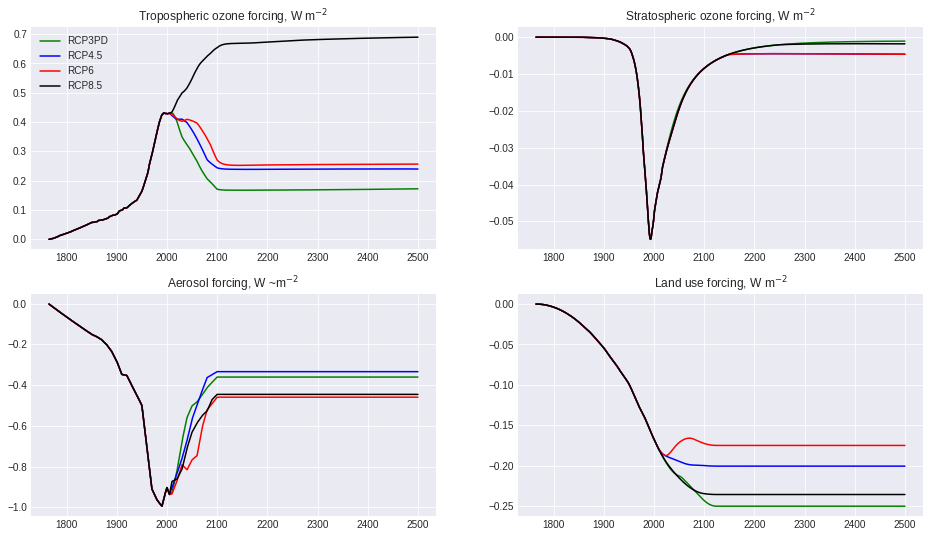

In [27]:
# set up the figure with the subplots

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# for graph 1 in the top left set up the different RCP runs for tropospheric ozone forcing [:,4]

ax1.plot(rcp3pd.Emissions.year, F26[:,4], color='green', label='RCP3PD') # tropospheric ozone forcing (W m^-2) for RCP 2.6 in the top left plot
ax1.plot(rcp45.Emissions.year, F45[:,4], color='blue', label='RCP4.5') # tropospheric ozone forcing (W m^-2) for RCP 4.5 in the top left plot
ax1.plot(rcp6.Emissions.year, F60[:,4], color='red', label='RCP6') # tropospheric ozone forcing (W m^-2) for RCP 6 in the top left plot
ax1.plot(rcp85.Emissions.year, F85[:,4], color='black', label='RCP8.5') # tropospheric ozone forcing (W m^-2) for RCP8.5 in the top left plot
ax1.set_title("Tropospheric ozone forcing, W m$^{-2}$") # axis title

# for graph 2 top right set up the different RCP runs for stratospoheric ozone forcing [:,5]

ax2.plot(rcp3pd.Emissions.year, F26[:,5], color='green', label='RCP3PD')
ax2.plot(rcp45.Emissions.year, F45[:,5], color='blue', label='RCP4.5')
ax2.plot(rcp6.Emissions.year, F60[:,5], color='red', label='RCP6')
ax2.plot(rcp85.Emissions.year, F85[:,5], color='black', label='RCP8.5')
ax2.set_title("Stratospheric ozone forcing, W m$^{-2}$")

# for graph 3 bottom left set up the different RCP runs for aerosol forcing [:,8]

ax3.plot(rcp3pd.Emissions.year, F26[:,8], color='green', label='RCP3PD')
ax3.plot(rcp45.Emissions.year, F45[:,8], color='blue', label='RCP4.5')
ax3.plot(rcp6.Emissions.year, F60[:,8], color='red', label='RCP6')
ax3.plot(rcp85.Emissions.year, F85[:,8], color='black', label='RCP8.5')
ax3.set_title("Aerosol forcing, W ~m$^{-2}$")

# for graph 3 bottom right set up the different RCP runs for land use forcing [:,10]

ax4.plot(rcp3pd.Emissions.year, F26[:,10], color='green', label='RCP3PD')
ax4.plot(rcp45.Emissions.year, F45[:,10], color='blue', label='RCP4.5')
ax4.plot(rcp6.Emissions.year, F60[:,10], color='red', label='RCP6')
ax4.plot(rcp85.Emissions.year, F85[:,10], color='black', label='RCP8.5')
ax4.set_title("Land use forcing, W m$^{-2}$")
ax1.legend();


1. CO2
2. CH4
3. N2O
4. Minor GHGs (CFCs, HFCs etc)
5. Tropospheric ozone
6. Stratospheric ozone
7. Stratospheric water vapour from methane oxidation
8. Contrails
9. Aerosols
10. Black carbon on snow
11. Land use
12. Volcanic
13. Solar





## Ensemble generation
An advantage of FaIR is that it is very quick to run (much less than a second on an average machine). Therefore it can be used to generate probabilistic future ensembles. We'll show a 100-member ensemble.

In [28]:
from scipy import stats # import the statistics model
from fair.tools.ensemble import tcrecs_generate   # generates a distribution of transient climate response (TCR) and emissions climate sensitivity (ECS) 

# generate some joint lognormal TCR and ECS pairs
tcrecs = tcrecs_generate(n=100, seed=38571) # n is the no. of samples, and seed is a random seed, to generate a 2-column array of TCR and ECS values to sample from

# generate some forcing scale factors with SD of 10% of the best estimate
F_scale = stats.norm.rvs(size=(100,13), loc=1, scale=0.1, random_state=40000) # generate some random values within a normal distribution range

# do the same for the carbon cycle parameters
r0 = stats.norm.rvs(size=100, loc=35, scale=3.5, random_state=41000) # generate random values for the pre-industrial sensitivity of carbon sinks (r0)
rc = stats.norm.rvs(size=100, loc=0.019, scale=0.0019, random_state=42000) # generate random values for the sensitivity to cumulative carbon dioxide emissions (rc)
rt = stats.norm.rvs(size=100, loc=4.165, scale=0.4165, random_state=45000) # generate random values for the sensitivity to temperature change (rt)

T = np.zeros((736,100)) # set the temperature as an array of zeros with the following dimensions

In [29]:
%%time # shows the time execution of a python statement or run thingamabob
for i in range(100): # for each value from 1 to 100 run the following loop
    _, _, T[:,i] = fair.forward.fair_scm(emissions=rcp85.Emissions.emissions, # run the model i guess
                        r0 = r0[i], # using th first (and so on) value for pre-industrial sensitivity of carbon sinks
                        rc = rc[i], # using the first (and so on) value for sensitivity to cumulative carbon emissions
                        rt = rt[i], # using the first (and so on) value for sensitivity to temperature chages
                        tcrecs = tcrecs[i,:], # using the first values (and so on) from the random-ish 2 column array of TCR and ECS values
                        scale = F_scale[i,:], # using the values of force scale factors within SD 10% of the best estimate
                        F2x = 3.74*F_scale[i,0])   # scale F2x with the CO2 scaling factor for consistency # equivalent value for the doubling og Co2????

CPU times: user 38.5 s, sys: 2.91 s, total: 41.4 s
Wall time: 37.6 s


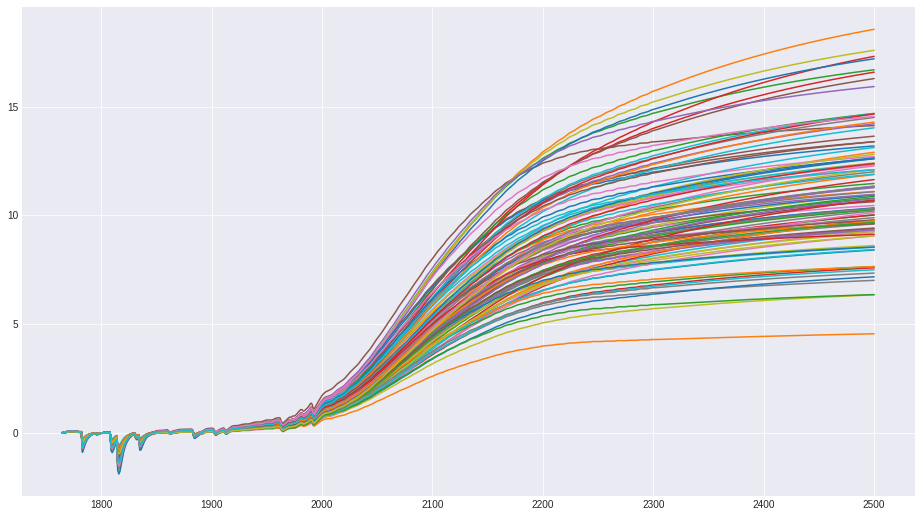

In [30]:
fig = plt.figure()
ax1 = fig.add_subplot(111) # set up the position of the plot
ax1.plot(rcp85.Emissions.year, T); # create the plot for RCP 8.5 of temperature for all the different model runs derived from the loop above

The resulting projections show a large spread. Some of these ensemble members are unrealistic, ranging from around 0.4 to 2.0 K temperature change in the present day, whereas we know in reality it is more like 0.9 (plus or minus 0.2). Therefore we can constrain this ensemble to observations.

In [31]:
# constraining the ensemble to observations (i.e. removing the unrealistic ones based on observations and historical data)

try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen
    
from fair.tools.constrain import hist_temp

# load up Cowtan and Way data remotely
url = 'http://www-users.york.ac.uk/~kdc3/papers/coverage2013/had4_krig_annual_v2_0_0.txt'
response = urlopen(url)

CW = np.loadtxt(response)
constrained = np.zeros(100, dtype=bool) # set up the np.zeros array for the constrained dataset that can be used later

for i in range(100):
    # we use observed trend from 1880 to 2016 - constrain the model data using the historical range
    constrained[i], _, _, _, _ = hist_temp(CW[30:167,1], T[1880-1765:2017-1765,i], CW[30:167,0])
    
# How many ensemble members passed the constraint?
print('%d ensemble members passed historical constraint' % np.sum(constrained))

49 ensemble members passed historical constraint


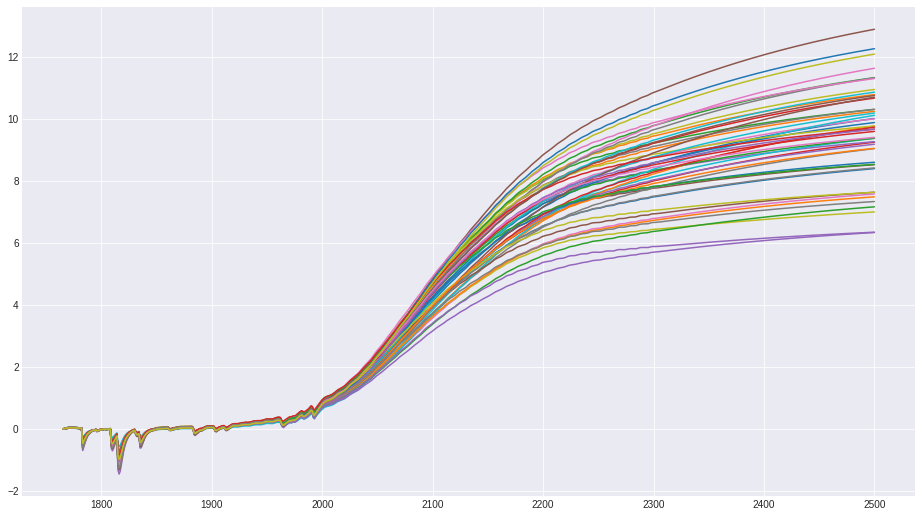

In [32]:
# What does this do to the ensemble?
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(rcp85.Emissions.year, T[:,constrained]); # plot the constrained data to get a visual on how the good data looks

Some, but not all, of the higher end scenarios have been constrained out, but there is still quite a large range of total temperature change projected for 2500 even under this constraint.

From these constraints it is possible to obtain posterior distributions on effective radiative forcing, ECS, TCR, TCRE and other metrics.